In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
num_list = ['809_030915', '809_110914', '986_100215', '986_261016']
avgrcs_coad_c = {}
for num in num_list:
    fn = 'gc-avg-COAD-cancer-' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_coad_c[num] = avg_rc

In [9]:
df_avgrcs_coad_c

,809_030915,809_110914,986_100215,986_261016
0,0.948935,0.945305,0.957928,0.951072
1,0.947656,0.945658,0.958577,0.949699
2,0.947666,0.944264,0.960462,0.951921
3,0.949273,0.945052,0.961860,0.952869
4,0.948793,0.944137,0.959742,0.952824
...,...,...,...,...
498,0.934502,0.940565,0.947331,0.957543
499,0.935351,0.939972,0.948429,0.958863
500,0.935737,0.937064,0.949397,0.958818
501,0.931929,0.935865,0.949747,0.956566


In [8]:
df_avgrcs_coad_c = pd.DataFrame(avgrcs_coad_c)
temp_coad_c = df_avgrcs_coad_c.T
temp_coad_c = temp_coad_c.reset_index()
temp_coad_c = pd.melt(temp_coad_c, id_vars = ["index"], value_vars = list(set(temp_coad_c.columns.tolist())))
temp_coad_c['label'] = 'cancerPeak_cancerFile'
temp_coad_c = temp_coad_c[temp_coad_c.variable <= 501]
temp_coad_c

,index,variable,value,label
0,809_030915,0,0.948935,cancerPeak_cancerFile
1,809_110914,0,0.945305,cancerPeak_cancerFile
2,986_100215,0,0.957928,cancerPeak_cancerFile
3,986_261016,0,0.951072,cancerPeak_cancerFile
4,809_030915,1,0.947656,cancerPeak_cancerFile
...,...,...,...,...
2003,986_261016,500,0.958818,cancerPeak_cancerFile
2004,809_030915,501,0.931929,cancerPeak_cancerFile
2005,809_110914,501,0.935865,cancerPeak_cancerFile
2006,986_100215,501,0.949747,cancerPeak_cancerFile


In [4]:
num_list = ['556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572']
avgrcs_coad_h = {}
for num in num_list:
    fn = 'gc-avg-COAD-healthy-WHC' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_coad_h[num] = avg_rc

In [5]:
df_avgrcs_coad_h = pd.DataFrame(avgrcs_coad_h)
temp_coad_h = df_avgrcs_coad_h.T
temp_coad_h = temp_coad_h.reset_index()
temp_coad_h = pd.melt(temp_coad_h, id_vars = ["index"], value_vars = list(set(temp_coad_h.columns.tolist())))
temp_coad_h['label'] = 'cancerPeak_healthyFile'
temp_coad_h = temp_coad_h[temp_coad_h.variable <= 501]
temp_coad_h

,index,variable,value,label
0,556,0,0.992946,cancerPeak_healthyFile
1,557,0,0.976223,cancerPeak_healthyFile
2,558,0,1.016114,cancerPeak_healthyFile
3,559,0,1.006695,cancerPeak_healthyFile
4,560,0,0.995732,cancerPeak_healthyFile
...,...,...,...,...
8529,568,501,1.001526,cancerPeak_healthyFile
8530,569,501,0.982876,cancerPeak_healthyFile
8531,570,501,0.976600,cancerPeak_healthyFile
8532,571,501,0.987171,cancerPeak_healthyFile


In [6]:
temp_coad = pd.concat([temp_coad_h, temp_coad_c], ignore_index = True)
temp_coad['new_variable'] = temp_coad['variable'] - 250
temp_coad

,index,variable,value,label,new_variable
0,556,0,0.992946,cancerPeak_healthyFile,-250
1,557,0,0.976223,cancerPeak_healthyFile,-250
2,558,0,1.016114,cancerPeak_healthyFile,-250
3,559,0,1.006695,cancerPeak_healthyFile,-250
4,560,0,0.995732,cancerPeak_healthyFile,-250
...,...,...,...,...,...
10537,986_261016,500,0.958818,cancerPeak_cancerFile,250
10538,809_030915,501,0.931929,cancerPeak_cancerFile,251
10539,809_110914,501,0.935865,cancerPeak_cancerFile,251
10540,986_100215,501,0.949747,cancerPeak_cancerFile,251


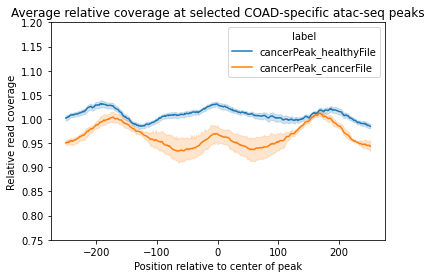

In [16]:
plt.figure()
plt.ylim(0.75,1.2)
p = sns.lineplot(data = temp_coad, x = "new_variable", y = "value", hue = "label", estimator = np.mean, ci = 95)
p.set_xlabel("Position relative to center of peak")
p.set_ylabel("Relative read coverage")
p.set(title="Average relative coverage at selected COAD-specific atac-seq peaks")
plt.savefig('avg_relative_read_coverage.pdf')

In [2]:
num_list = ['809_030915', '809_110914', '986_100215', '986_261016']
avgrcs_coad_c_zo = {}
for num in num_list:
    fn = 'gc-zo-avg-COAD-cancer-' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_coad_c_zo[num] = avg_rc

In [3]:
df_avgrcs_coad_c_zo = pd.DataFrame(avgrcs_coad_c_zo)
temp_coad_c_zo = df_avgrcs_coad_c_zo.T
temp_coad_c_zo = temp_coad_c_zo.reset_index()
temp_coad_c_zo = pd.melt(temp_coad_c_zo, id_vars = ["index"], value_vars = list(set(temp_coad_c_zo.columns.tolist())))
temp_coad_c_zo['label'] = 'cancerPeak_cancerFile'
temp_coad_c_zo = temp_coad_c_zo[temp_coad_c_zo.variable <= 1999]
temp_coad_c_zo

,index,variable,value,label
0,809_030915,0,1.028968,cancerPeak_cancerFile
1,809_110914,0,1.017480,cancerPeak_cancerFile
2,986_100215,0,1.015010,cancerPeak_cancerFile
3,986_261016,0,1.014201,cancerPeak_cancerFile
4,809_030915,1,1.028059,cancerPeak_cancerFile
...,...,...,...,...
7995,986_261016,1998,0.981591,cancerPeak_cancerFile
7996,809_030915,1999,0.987009,cancerPeak_cancerFile
7997,809_110914,1999,0.983836,cancerPeak_cancerFile
7998,986_100215,1999,0.980446,cancerPeak_cancerFile


In [10]:
num_list = ['556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572']
avgrcs_coad_h_zo = {}
for num in num_list:
    fn = 'gc-zo-avg-COAD-healthy-WHC' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_coad_h_zo[num] = avg_rc

In [11]:
df_avgrcs_coad_h_zo = pd.DataFrame(avgrcs_coad_h_zo)
temp_coad_h_zo = df_avgrcs_coad_h_zo.T
temp_coad_h_zo = temp_coad_h_zo.reset_index()
temp_coad_h_zo = pd.melt(temp_coad_h_zo, id_vars = ["index"], value_vars = list(set(temp_coad_h_zo.columns.tolist())))
temp_coad_h_zo['label'] = 'cancerPeak_healthyFile'
temp_coad_h_zo = temp_coad_h_zo[temp_coad_h_zo.variable <= 1999]
temp_coad_h_zo

,index,variable,value,label
0,556,0,1.011570,cancerPeak_healthyFile
1,557,0,1.020072,cancerPeak_healthyFile
2,558,0,1.023676,cancerPeak_healthyFile
3,559,0,1.025906,cancerPeak_healthyFile
4,560,0,1.014956,cancerPeak_healthyFile
...,...,...,...,...
33995,568,1999,0.982433,cancerPeak_healthyFile
33996,569,1999,0.990195,cancerPeak_healthyFile
33997,570,1999,0.938547,cancerPeak_healthyFile
33998,571,1999,0.959224,cancerPeak_healthyFile


In [13]:
temp_coad_zo = pd.concat([temp_coad_h_zo, temp_coad_c_zo], ignore_index = True)
temp_coad_zo['new_variable'] = temp_coad_zo['variable'] - 1000
temp_coad_zo

,index,variable,value,label,new_variable
0,556,0,1.011570,cancerPeak_healthyFile,-1000
1,557,0,1.020072,cancerPeak_healthyFile,-1000
2,558,0,1.023676,cancerPeak_healthyFile,-1000
3,559,0,1.025906,cancerPeak_healthyFile,-1000
4,560,0,1.014956,cancerPeak_healthyFile,-1000
...,...,...,...,...,...
41995,986_261016,1998,0.981591,cancerPeak_cancerFile,998
41996,809_030915,1999,0.987009,cancerPeak_cancerFile,999
41997,809_110914,1999,0.983836,cancerPeak_cancerFile,999
41998,986_100215,1999,0.980446,cancerPeak_cancerFile,999


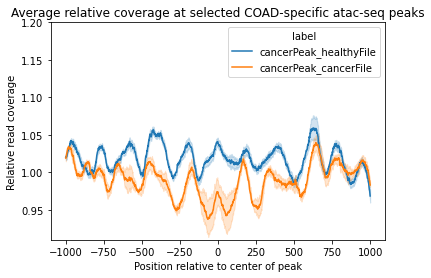

In [15]:
plt.figure()
plt.ylim(0.91,1.2)
p = sns.lineplot(data = temp_coad_zo, x = "new_variable", y = "value", hue = "label", estimator = np.mean, ci = 95)
p.set_xlabel("Position relative to center of peak")
p.set_ylabel("Relative read coverage")
p.set(title="Average relative coverage at selected COAD-specific atac-seq peaks")
plt.savefig('avg_relative_read_coverage.pdf')